<table >
    <colgroup>
       <col span="1" style="width: 10%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="FH_Koblenz.svg" width="80%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
</table>


# Elektronik I

## Grundlagenwiederholung 

### Schaltungstechnik, Zeitbereich, Frequenzbereich

## Aufgaben
### Gegeben sind die Schaltungen:

1. Skizzieren Sie den Zeitverlauf
1. Skizzieren Sie den Frequenzverlauf
1. Leiten Sie die Differenzialgleichungen ab
1. Leiten Sie die Differenzialgleichungen im Zustandsraum ab (Die Ausgangvariable ist $i_\mathrm{a}(t)$)
1. Leiten Sie die zeitabhängige Lösung des Stroms $i_\mathrm{a}(t)$ mittels Laplace-Transformation her
1. Leiten Sie die Übertragungsfunktion $G(s)=\frac{I_\mathrm{L}(s)}{U_\mathrm{e}(s)}$ ab 
1. Leiten Sie die Übertragungsfunktion $G(s)=\frac{I_\mathrm{L}(\mathrm{j} \omega)}{U_\mathrm{e}(\mathrm{j} \omega)}$ mittels Phasor-Gleichungen her
1. Leiten Sie die normalisierten Parameter der Schaltungen her
1. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Zeitbereich
1. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Frequenzbereich

| | | | |
|:--:|:--:|:--:|:--:|
| <img src="Ele1-0-Ab01.svg" Hight="200"/><br>(a) | <img src="Ele1-0-Ab02.svg" height="200"/><br>(b) |<img src="Ele1-0-Ab03.svg" Hight="200"/> <br>(c) |
|<img src="Ele1-0-Ab04.svg" Hight="200"/> <br>(d) | <img src="Ele1-0-Ab05.svg" Hight="200"/><br>(e)  |
| <img src="Ele1-0-Ab06.svg" Hight="200"/><br>(f) | <img src="Ele1-0-Ab07.svg" Hight="200"/> <br>(g) |
|<img src="Ele1-0-Ab15.svg" Hight="200"/> <br>(h) |<img src="Ele1-0-Ab16.svg" Hight="200"/> <br>(i)|
| <img src="Ele1-0-Ab08.svg" Hight="200"/><br>(j)| <img src="Ele1-0-Ab09.svg" Hight="200"/><br>(k) | <img src="Ele1-0-Ab10.svg" Hight="200"/><br>(l)  |
|<img src="Ele1-0-Ab14.svg" Hight="200"/><br>(m) |

### Lösung (d)

[1. Skizzieren Sie den Zeitverlauf](00-ELE1-1-d-1.ipynb)

Eq(i_R(t), Ue/R + (Io*R - Ue)*exp(-R*t/L)/R)

Eq(i_R(t), 10 - 10*exp(-100.0*t))

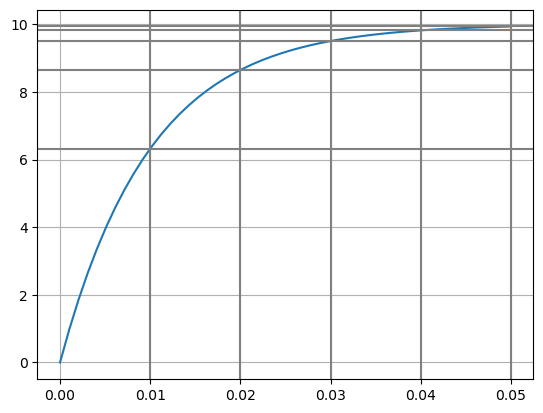

Eq(tau, L/R)

Eq(tau, 0.01)

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

t,s = sp.symbols('t,s')
Ue,Ie,R,C,L,Io=sp.symbols('Ue,Ie,R,C,L,Io',real=True)

i_R = sp.Function('i_R')
u_R = sp.Function('u_R')

equ=L*i_R(t).diff(t)+R*i_R(t)-Ue

i_R_t=sp.dsolve(equ,ics={i_R(0):Io})
display(i_R_t)

#Beispiel

R1=1
L1=10e-3
Ue1=10
tau1=L1/R1

t1=np.linspace(0,5*tau1) # Zeitvektor

i_R_t1=i_R_t.subs([(R,R1),(L,L1),(Ue,Ue1),(Io,0)]) #
display(i_R_t1)

i_R_t1n=sp.lambdify(t,i_R_t1.rhs, modules='numpy')

plt.figure()
plt.plot(t1,i_R_t1n(t1))
plt.axhline(i_R_t1n(tau1),color='gray')
plt.axvline(tau1,color='gray')
plt.axhline(i_R_t1n(2*tau1),color='gray')
plt.axvline(2*tau1,color='gray')
plt.axhline(i_R_t1n(3*tau1),color='gray')
plt.axvline(3*tau1,color='gray')
plt.axhline(i_R_t1n(4*tau1),color='gray')
plt.axvline(4*tau1,color='gray')
plt.axhline(i_R_t1n(5*tau1),color='gray')
plt.axvline(5*tau1,color='gray')
plt.grid()
plt.show()

tau=sp.symbols('tau')
display(sp.Eq(tau,L/R))
display(sp.Eq(tau,L1/R1))